<a href="https://colab.research.google.com/github/ambroz72/Data-Analytics---BSBI/blob/master/Mushroom_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load Dataset
df = pd.read_csv('mushrooms.csv')

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
# Display the first few rows of the dataset
print(df.head())

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

In [5]:
# Get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
# Identify unique values per column to classify feature types
for column in df.columns:
    unique_values = df[column].unique()
    print(f"{column}: {len(unique_values)} unique values - {unique_values}")

class: 2 unique values - ['p' 'e']
cap-shape: 6 unique values - ['x' 'b' 's' 'f' 'k' 'c']
cap-surface: 4 unique values - ['s' 'y' 'f' 'g']
cap-color: 10 unique values - ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises: 2 unique values - ['t' 'f']
odor: 9 unique values - ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment: 2 unique values - ['f' 'a']
gill-spacing: 2 unique values - ['c' 'w']
gill-size: 2 unique values - ['n' 'b']
gill-color: 12 unique values - ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape: 2 unique values - ['e' 't']
stalk-root: 5 unique values - ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring: 4 unique values - ['s' 'f' 'k' 'y']
stalk-surface-below-ring: 4 unique values - ['s' 'f' 'y' 'k']
stalk-color-above-ring: 9 unique values - ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring: 9 unique values - ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type: 1 unique values - ['p']
veil-color: 4 unique values - ['w' 'n' 'o' 'y']
ring-number: 3 unique v

In [7]:
# Check the data types of each column
df.dtypes

,0
class,object
cap-shape,object
cap-surface,object
cap-color,object
bruises,object
odor,object
gill-attachment,object
gill-spacing,object
gill-size,object
gill-color,object


<ipython-input-8-160675267152>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['class'], palette="coolwarm")


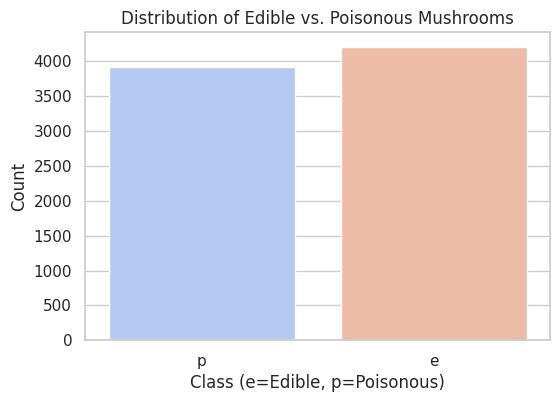

In [8]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Visualizing the target variable distribution (edible vs. poisonous)
plt.figure(figsize=(6, 4))
sns.countplot(x=df['class'], palette="coolwarm")
plt.title("Distribution of Edible vs. Poisonous Mushrooms")
plt.xlabel("Class (e=Edible, p=Poisonous)")
plt.ylabel("Count")
plt.show()

# Visualizing the distribution of categorical features
def plot_feature_distribution(feature, df):
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[feature], order=df[feature].value_counts().index, palette="viridis")
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(rotation=45)  # Rotate labels for better readability
    plt.show()

# Select a few important features to visualize
features_to_visualize = ["cap-shape", "cap-color", "gill-color", "odor", "habitat"]

Top Features Correlated with Edibility:
gill-size     0.540024
gill-color    0.530566
bruises       0.501530
ring-type     0.411771
stalk-root    0.379361
Name: class, dtype: float64


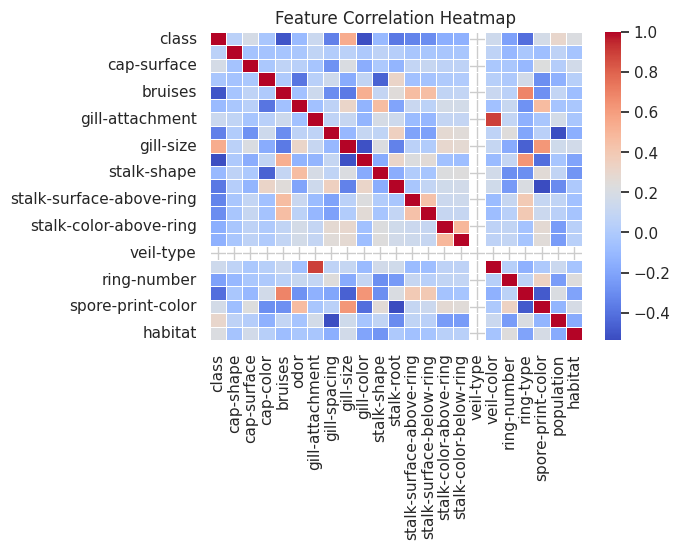

In [9]:
from sklearn.preprocessing import LabelEncoder
# Encode the target variable ('class') as numerical: 'e' -> 0, 'p' -> 1
df['class'] = LabelEncoder().fit_transform(df['class'])

# Apply Label Encoding to all categorical features
encoded_df = df.apply(LabelEncoder().fit_transform)

# Compute the correlation matrix
correlation_matrix = encoded_df.corr()

# Extract correlations with the target variable ('class')
target_correlation = correlation_matrix["class"].abs().sort_values(ascending=False)

# Display the top correlated features
print("Top Features Correlated with Edibility:")
print(target_correlation[1:6])  # Exclude the first row since it's correlation with itself

# Visualizing the top correlated features using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [10]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

Missing Values in Each Column:
 class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


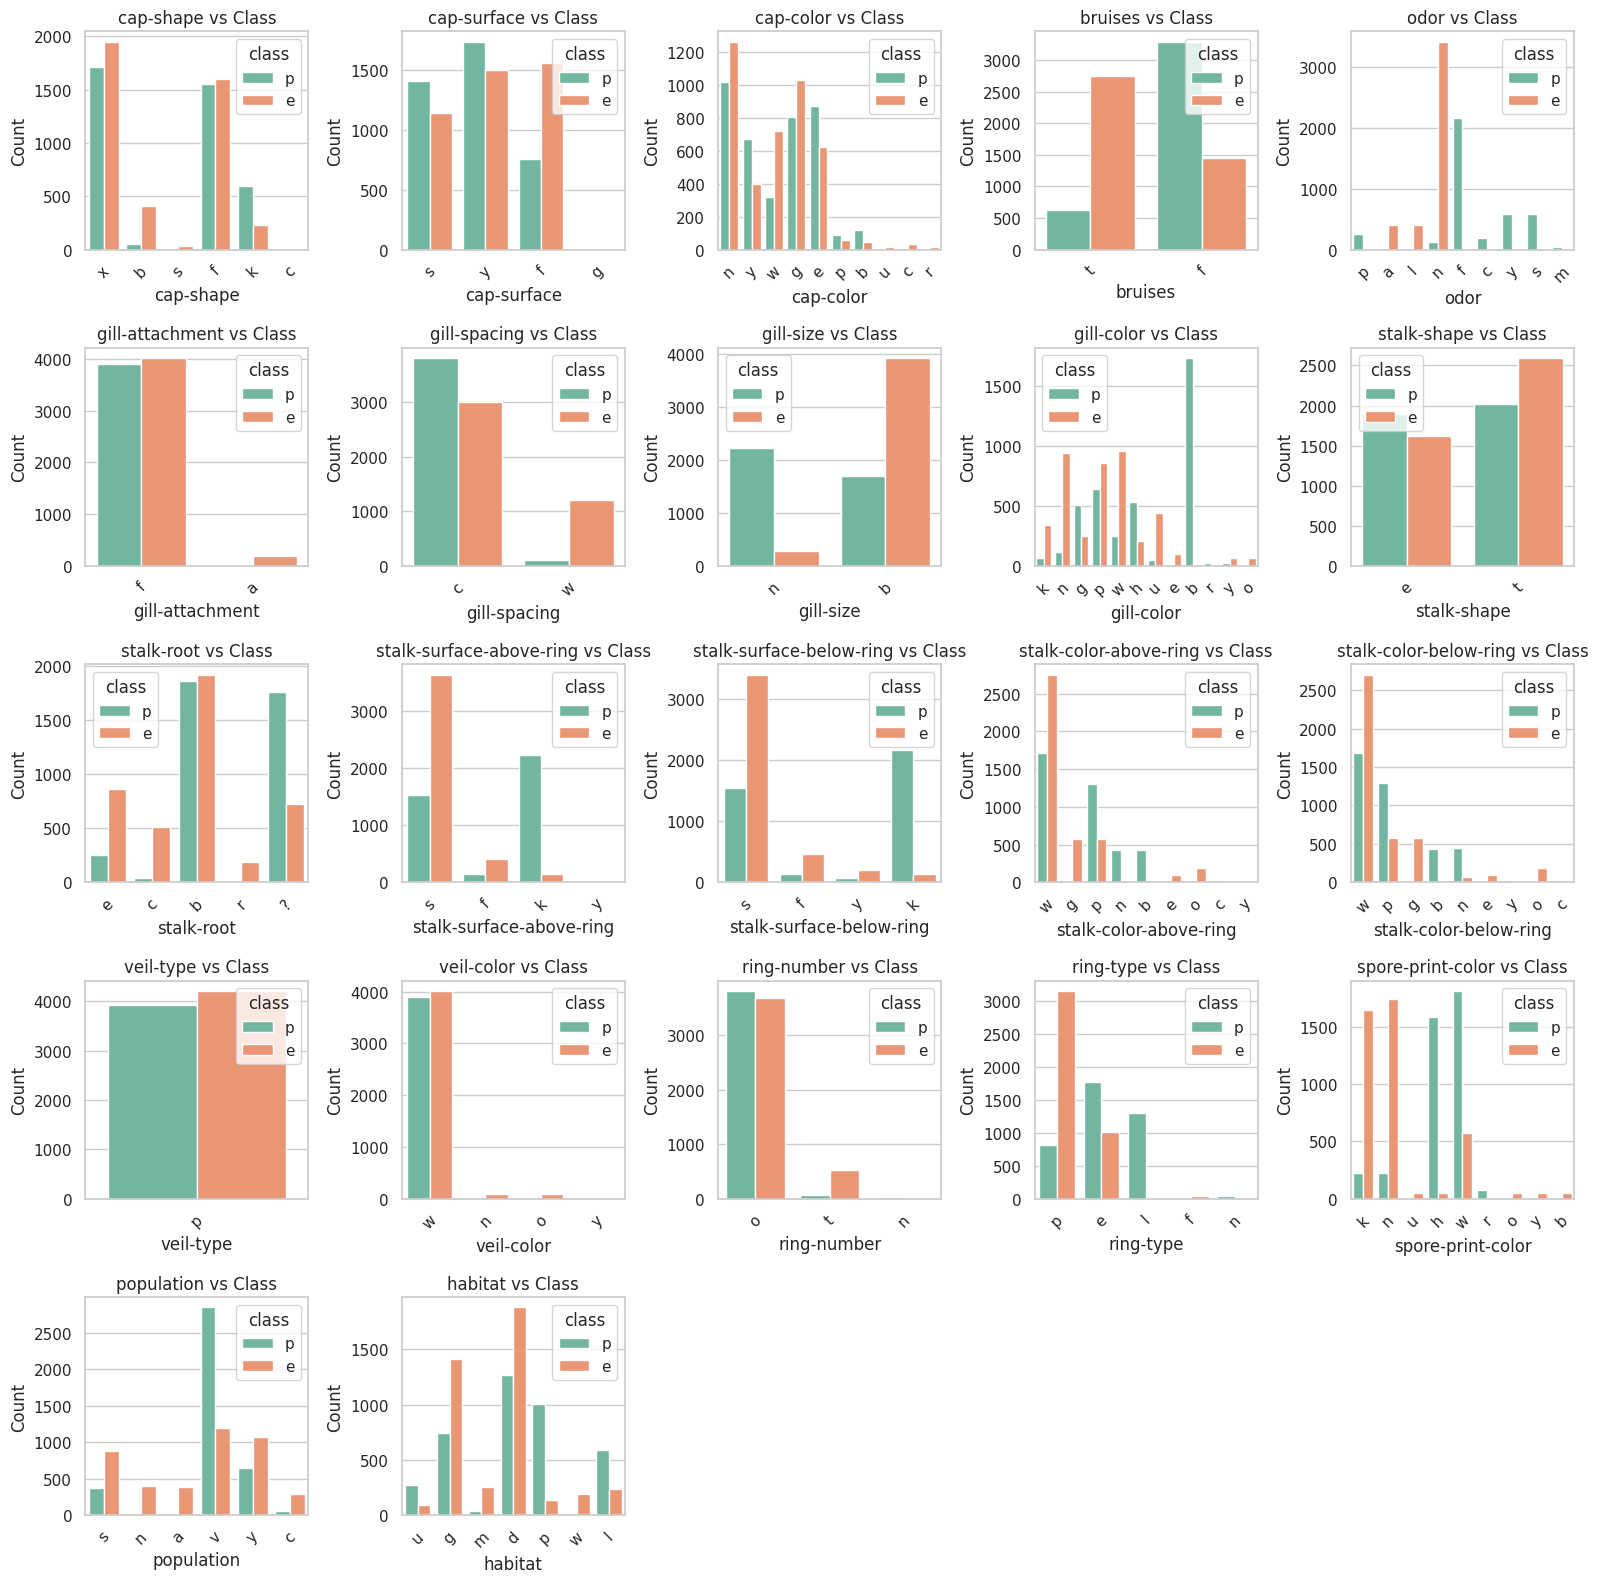

In [21]:
# Loading the dataset
mushrooms_df = pd.read_csv("mushrooms.csv")

# Setting the plot style
sns.set(style="whitegrid", palette="pastel", context="notebook")

# Iterating over the features to analyze the relationship with `class`
features = mushrooms_df.columns.drop("class")  # Excluding the target variable
rows, cols = 5, 5  # Grid dimensions for subplots
fig, axes = plt.subplots(rows, cols, figsize=(16,16))

for feature, ax in zip(features, axes.flatten()):
    sns.countplot(data=mushrooms_df, x=feature, hue="class", ax=ax, palette="Set2")
    ax.set_title(f"{feature} vs Class")
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")
    ax.tick_params(axis="x", rotation=45)

# Adjusting layout and removing unused subplots
for i in range(len(features), rows * cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()



In [12]:
# List of models
models = {
    "GaussianNB": GaussianNB(),
    "RandomForest": RandomForestClassifier(),
    "DecisionTree": DecisionTreeClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "SVC": SVC(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier()
}

# Train & evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred)
    }

# Display results
pd.DataFrame(results).T

,Accuracy,Precision,Recall,F1-score
GaussianNB,0.921846,0.909887,0.929668,0.919671
RandomForest,1.000000,1.000000,1.000000,1.000000
DecisionTree,1.000000,1.000000,1.000000,1.000000
LogisticRegression,0.947692,0.943949,0.947570,0.945756
SVC,0.992615,0.998705,0.985934,0.992278
KNN,0.996308,0.992386,1.000000,0.996178
XGBoost,1.000000,1.000000,1.000000,1.000000


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                        Accuracy  Precision    Recall  F1-Score
Gaussian Naive Bayes    0.921846   0.909887  0.929668  0.919671
Random Forest           1.000000   1.000000  1.000000  1.000000
Decision Tree           1.000000   1.000000  1.000000  1.000000
Logistic Regression     0.946462   0.942675  0.946292  0.944480
Support Vector Machine  0.992615   0.998705  0.985934  0.992278
K-Nearest Neighbors     0.996308   0.992386  1.000000  0.996178
XGBoost                 1.000000   1.000000  1.000000  1.000000


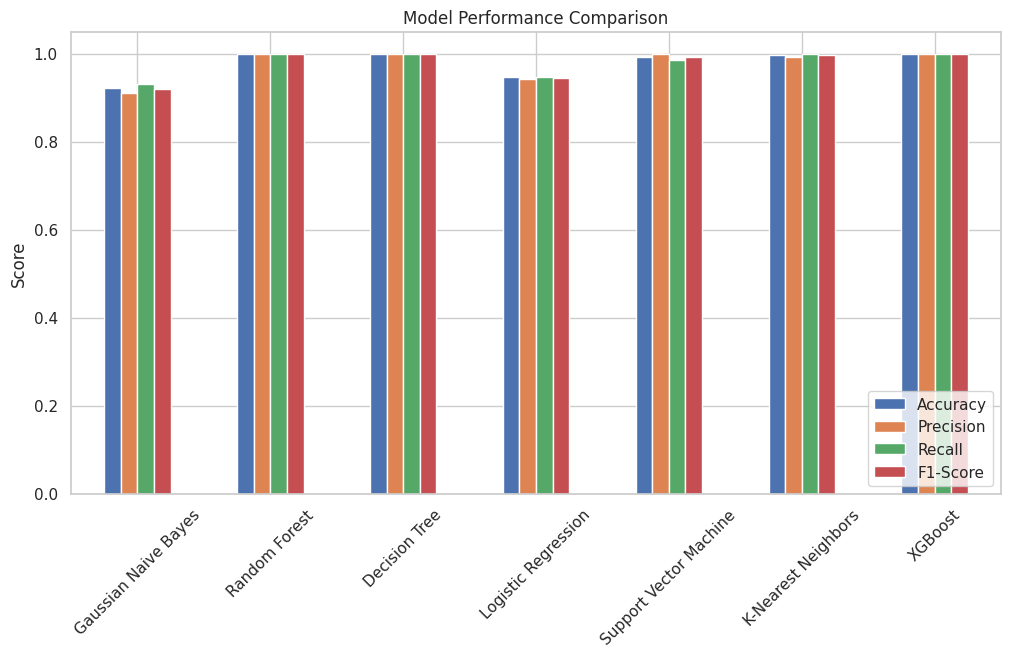

In [11]:
# Encode categorical variables
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split Data
X = df.drop(columns=['class'])
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Gaussian Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    }

# Display Results
results_df = pd.DataFrame(results).T
print(results_df)

# Plot Results
results_df.plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()

In [22]:
best_model = max(results, key=lambda k: results[k]['F1-score'])
print("Best performing model:", best_model)

Best performing model: RandomForest
